<a href="https://colab.research.google.com/github/anthonymnf/processador-MIPS16/blob/main/MIPS16_Anthony_Matheus_Vfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Projeto de processador (versão final)

Author: Anthony Matheus

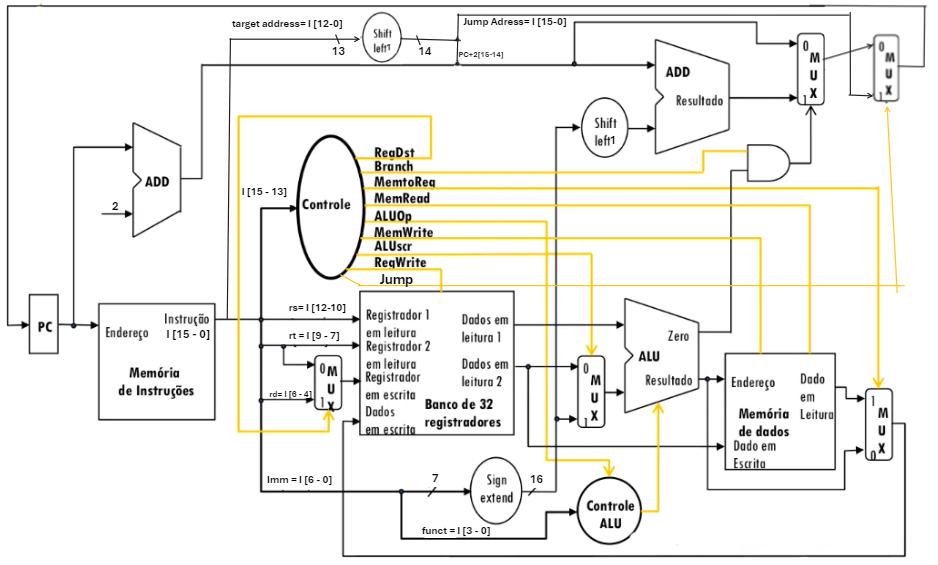

In [1]:
# biblioteca do verilog
%%bash
sudo apt-get update
sudo apt-get install verilog iverilog gtkwave

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,370 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,161 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,194 kB]
Get:13 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu22

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 9.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


In [2]:
!pip install git+https://github.com/lesc-ufv/cad4u >& /dev/null
!git clone https://github.com/lesc-ufv/cad4u >& /dev/null
%load_ext plugin

In [3]:
%%file pc.sv
// Contador de programa (PC)
module pc (clk, comandos, instruction, zero, address, targetadress);
  // Declaracao de portas
  input clk, zero;
  input [9:0] comandos;
  input [12:0] targetadress;
  input [15:0] instruction;
  output reg [15:0] address;

  // Variaveis intermediarias
  wire [15:0] extensao = { 9'd0, instruction[6:0] };
  wire [15:0] shift = extensao << 1;
  wire [13:0] jumpshift = targetadress << 1;
  wire muxBranch = comandos[3]; // Branch
  wire muxJump = comandos[0]; // Jump

  // Iniciando endereco
  initial begin
    address = -16'd2;
  end

  // Funcionamento do contador
  always @( posedge clk ) begin
    address <= address + 16'd2;
    // Condicao do Jump
    if ( muxJump == 1'b1 ) begin
      address <= {address[15:14], jumpshift};
    end
    // Condicao do Branch
    if (( muxBranch == 1'b1 ) & ( zero == 1'b1 ) & ( muxJump == 1'b0 )) begin
      address <= address + shift;
    end
  end

endmodule

Writing pc.sv


**Instruções:**

----
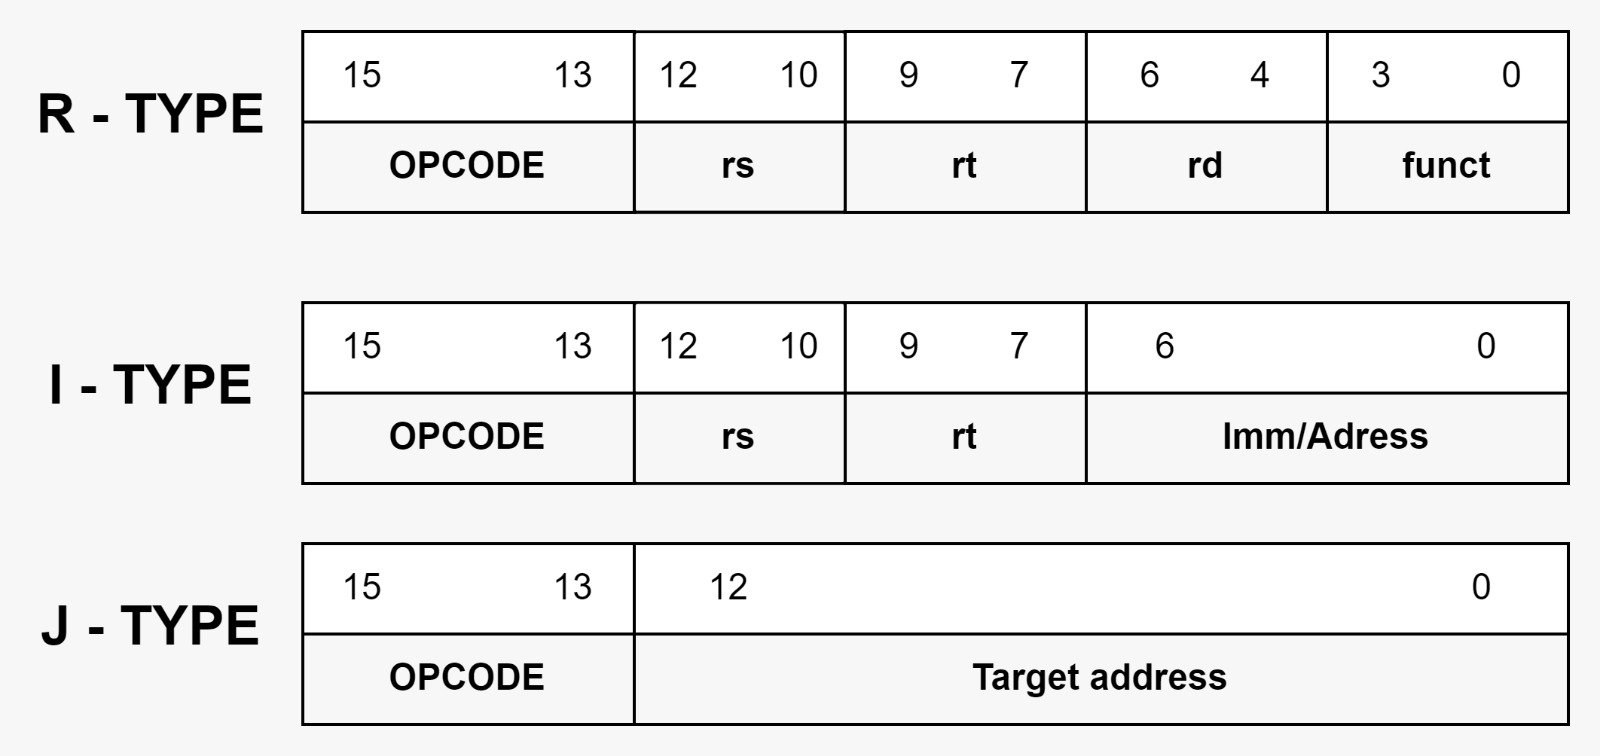

**lw rs, Offset(rt);**

* 3 bits ( opcode ) = **100**
* 3 bits ( registrador fonte ) = **000**
* 3 bits ( registrador destino ) = **001**
* 7 bits ( imediato ) = **0000011**


```

Ex.: lw $s1, 3($s0);
         $s1 = ($s0) + 16'd3;
         $s1 = 3;
```

**lw rs, Offset(rt);**

* 3 bits ( opcode ) = **100**
* 3 bits ( registrador fonte ) = **000**
* 3 bits ( registrador destino ) = **010**
* 7 bits ( imediato ) = **0000101**


```

Ex.: lw $s2, 5($s0);
         $s2 = ($s0) + 16'd5;
         $s2 = 5;
```

**add rs, rt, rd;**

* 3 bits ( opcode ) = **000**
* 3 bits ( registrador origem 1 ) = **001**
* 3 bits ( registrador origem 2 ) = **010**
* 3 bits ( registrador destino ) = **011**
* 4 bits ( funct - variacoes das operacoes especificadas do opcode ) = **0000**

```
Ex.: add $s3, $s1, $s2;
         $s3 = 3 + 5 = 8
```

**sub rs, rt, rd;**

* 3 bits ( opcode ) = **000**
* 3 bits ( registrador origem 1 ) = **010**
* 3 bits ( registrador origem 2 ) = **001**
* 3 bits ( registrador destino ) = **100**
* 4 bits ( funct - variacoes das operacoes especificadas do opcode ) = **0001**

```
Ex. sub $s4, $s2, $s1;
        $s4 = 5 - 3 = 2
```

**sw rs, Offset(rt);**

* 3 bits ( opcode ) = **101**
* 3 bits ( registrador fonte ) = **000**
* 3 bits ( registrador destino ) = **011**
* 7 bits ( imediato ) = **0000000**


```
Ex.: sw $s0, 3($s0);
         $s0 = ($s0) + 16'd3;
         $s0 = 8;
```
**Tipo J**
* 3 bits ( opcode ) = **010**
* 13 bits ( target address ) = **0000000000001**

**and rs, rt, rd;**

* 3 bits ( opcode ) = **000**
* 3 bits ( registrador origem 1 ) = **010**
* 3 bits ( registrador origem 2 ) = **001**
* 3 bits ( registrador destino ) = **011**
* 4 bits ( funct - variacoes das operacoes especificadas do opcode ) = **0010**

```
Ex.: or $s3, $s1, $s2;
         $s3 = 1 & 0 = 0
```

**or rs, rt, rd;**

* 3 bits ( opcode ) = **000**
* 3 bits ( registrador origem 1 ) = **010**
* 3 bits ( registrador origem 2 ) = **001**
* 3 bits ( registrador destino ) = **000**
* 4 bits ( funct - variacoes das operacoes especificadas do opcode ) = **0011**

```
Ex.: or $s3, $s1, $s2;
         $s3 = 1 | 0 = 1
```

**xor rs, rt, rd;**

* 3 bits ( opcode ) = **000**
* 3 bits ( registrador origem 1 ) = **010**
* 3 bits ( registrador origem 2 ) = **001**
* 3 bits ( registrador destino ) = **011**
* 4 bits ( funct - variacoes das operacoes especificadas do opcode ) = **0100**

```
Ex.: xor $s3, $s1, $s2;
         $s3 = 1 ^ 0 = 1
```

----
**Para facilitar a testagem, do procesador, abaixo estão alguns conjuntos de instruções prontos para testar**

**Conjunto 1:**

* Duas instruções Load, carregando os números 3 e 5 para o banco de registradores**
* Uma adição que salva o dado no registrador **011**
* Um Jump para a instrução store
* Uma subtração que salva o dado no registrador **011**, o mesmo registrador da instrução de soma, no entanto essa instrução é pulada
* Um Store para a posição **011** da memória

```
10000000
10000011
10000001
00000101
00000101
00110000
01000000
00000101
00001000
10110001
10100001
10000000
```

**Conjunto 2:**

* Duas instruções Load, carregando os números 1 e 0 para o banco de registradores**
* Uma AND que salva o dado no registrador **011**
* Uma OR que salva o dado no registrador **000**
* Uma XOR que salva o dado no registrador **011**

```
10000000
10000001
10000001
00000000
00001000
10110010
00001000
10000011
00001000
10110100
```

---

In [4]:
%%file instructions.txt
10000000
10000001
10000001
00000000
00001000
10110010
00001000
10000011
00001000
10110100

Writing instructions.txt


In [5]:
%%file instructions_memory.sv
`define NULL 0

// Memória de instrucoes
module instructions_memory ( clk, pc, instruction );
  // Declaracao de portas
  input clk;
  input [15:0] pc;
  output [15:0] instruction;

  integer f, r; // arquivo
  reg [7:0] data = 8'd0;
  integer counterMemory = 16'd0;

  // Criando uma memoria de instrucoes com 100 enderecos de 8 bits
  reg [7:0] memoriaInstrucoes [99:0];

  initial begin
    // Abrindo arquivo
    f = $fopen("/content/instructions.txt","r");
    // Se arquivo nao contem nenhuma informacao
    if ( f == `NULL ) begin
      $display("Arquivo sem instrucoes");
      $finish;
    end

    while (! $feof( f )) begin
      r = $fscanf( f,"%8b\n", data);
      memoriaInstrucoes[counterMemory] = data;
      counterMemory = counterMemory + 16'd1;
    end

    // Fechando arquivo
    $fclose( f );
  end

  // Atribuindo o valor da instrucao
  assign instruction = { memoriaInstrucoes[ pc + 16'd0 ],
                         memoriaInstrucoes[ pc + 16'd1 ]};

endmodule

Writing instructions_memory.sv


**Dados**: Cada linha do banco de registradores contém um dado.

```
  endereço do registrador
       | 3 bits  |
        --------------------------------------
dados  |    3    |    5    |  . . .  |        |  (16 bits)
        --------------------------------------
                     8 endereços
```

In [6]:
%%file register_bank.sv
// Banco de registradores
module register_bank ( clk, comandos, instruction, data_in, out1, out2, out3, memory );
  // Declaracao de portas
  input clk;
  input [9:0] comandos;
  input [15:0] instruction;
  input [15:0] data_in;
  output [15:0] out1, out2, out3;
  // 5 enderecos do banco de registradores
  output reg [127:0] memory;

  // Variaveis intermediarias
  wire RegDst = comandos[9];
  wire ALUscr = comandos[8];
  wire RegWrite = comandos[6];

  wire [2:0] addr_regd, addr_reg1, addr_reg2;
  assign addr_reg1 = instruction[12:10];
  assign addr_reg2 = instruction[9:7];
  assign addr_regd = ( RegDst == 1'b0 ) ? instruction[9:7] : instruction[6:4];

  wire [15:0] extensao = { 9'd0, instruction[6:0] };

  // Criando um banco de registradores com 8 enderecos de 16 bits
  reg [15:0] registerBank [7:0];

  // Inicializando o banco de registradores com valores iniciais
  integer i;
  initial begin
    for (i = 0; i < 16; i = i + 1) begin
      registerBank[i] <= 16'd0;
    end
  end

  // Descrevendo o comportamento de escrita no banco de registradores
  always @(posedge clk, data_in ) begin
    if ( RegWrite == 1'b1 ) begin
      registerBank[addr_regd] <= data_in;
    end
  end

  assign out1 = registerBank[addr_reg1];
  assign out2 = (ALUscr == 1'b1) ? extensao : registerBank[addr_reg2];
  assign out3 = registerBank[addr_reg2];

  always @( posedge clk, data_in ) begin
    memory <= {registerBank[0], registerBank[1], registerBank[2], registerBank[3]};
  end

endmodule

Writing register_bank.sv


In [7]:
%%file ula.sv
// Unidade logica aritmetica (ULA)
module ula ( control_ula, in1, in2, out, zero );
  // Declaracao de portas
  input [2:0] control_ula;
  input [15:0] in1, in2;
  output reg [15:0] out;
  output reg zero;

  // Descrevendo o comportamento da ULA
  always @( in1, in2, control_ula ) begin
    case ({control_ula})
      3'b000 : out = in1 + in2;
      3'b001 : out = in1 - in2;
      3'b010 : out = in1 & in2;
      3'b011 : out = in1 | in2;
      3'b100 : out = in1 ^ in2;
      default : out = 16'd0;
    endcase
    if ( out == -16'd0 ) begin
      zero = 1'b1;
    end
    else begin
      zero = 1'b0;
    end
  end

endmodule

Writing ula.sv


In [8]:
%%file control.sv
// Controle
module control ( opcode, out );
  input [2:0] opcode;
  // RegDst, ALUscr, MemtoReg, RegWrite, MemRead, MemWrite, Branch, ALUOp, Jump
  output reg [9:0] out;

  always @( opcode ) begin
    casex ({opcode})
      3'b000 : out = 10'b1001000000; // Tipo R
      3'b100 : out = 10'b0111100110; // LW (Tipo I)
      3'b101 : out = 10'b0100010110; // SW (Tipo I)
      3'b010 : out = 10'b0000000001; // (Tipo J)
      default   : out = 10'bxxxxxxxxxx;
    endcase
  end

endmodule

Writing control.sv


In [9]:
%%file control_ULA.sv
// Controle
module control_ULA ( ULAOp, funct, out );
  input [1:0] ULAOp;
  input [3:0] funct;
  output reg [2:0] out;

  always @( ULAOp, funct ) begin
    casex ({ULAOp,funct})
      6'b11xxxx : out = 3'b000; // LW, SW (Tipo I)
      6'b000000 : out = 3'b000; // soma
      6'b000001 : out = 3'b001; // subtracao
      6'b000010 : out = 3'b010; // e
      6'b000011 : out = 3'b011; // ou
      6'b000100 : out = 3'b100; // XOR
    endcase
  end
endmodule

Writing control_ULA.sv


In [10]:
%%file data_memory.sv
// Memoria de dados
module data_memory ( clk, addr, write_data, MemWrite, MemRead, MemtoReg, read_data, memory );
  input clk;
  input MemWrite, MemRead, MemtoReg;
  input [15:0] addr; // endereco memoria
  input [15:0] write_data; // dado escrito
  output reg [15:0] read_data; // dado lido
  output reg [127:0] memory;

  // Construindo memoria com 256 palavras de 16 bits
  reg [15:0] ram [0:255];

  // Inicializando a memoria com valores iniciais
  integer i;
  initial begin
    for (i = 0; i < 256; i = i + 1) begin
      ram[i] = i;
    end
  end

  always @( posedge clk, addr, MemWrite,MemRead,MemtoReg ) begin
    casex ({MemWrite,MemRead,MemtoReg})
      3'b000 : read_data <= addr;
      3'b011 : read_data <= ram[ addr ];
      3'b100 : ram[ addr ] <= write_data;
    endcase
  end

  always @( posedge clk, addr, MemWrite,MemRead,MemtoReg) begin
    memory <= {ram[0], ram[1], ram[2], ram[3]};
  end

endmodule

Writing data_memory.sv


In [11]:
%%file testbench.v

`include "pc.sv"
`include "instructions_memory.sv"
`include "control.sv"
`include "control_ULA.sv"
`include "register_bank.sv"
`include "ula.sv"
`include "data_memory.sv"

module testbench();
  // Test period
  parameter period = 2;

  reg clk;
  wire [9:0] commands;
  wire [15:0] instruction, address;
  wire [12:0] targetaddress;
  wire zero;

  // Program counter
  pc pc(clk, commands, instruction, zero, address, targetaddress);

  // Instruction memory
  instructions_memory instruction_memory( clk, address, instruction );

  wire [2:0] opcode;
  assign opcode = instruction[15:13];

  assign targetaddress = instruction[12:0];

  // Control
  control c( opcode, commands);

  wire [15:0] data_ula, out1, out2, out3, r_data;
  wire [127:0] registradores; // 3 enderecos do banco de registradores

  // Register bank
  register_bank register_bank( clk, commands, instruction, data_ula, out1, out2, out3, registradores );

  wire [2:0] ula_control;

  wire [1:0] ULAOp;
  assign ULAOp = commands[2:1];

  wire [3:0] funct;
  assign funct = instruction[3:0];

  // ULA control
  control_ULA control_ULA( ULAOp, funct, ula_control );

  wire [15:0] result;

  // ULA
  ula ula( ula_control, out1, out2, result, zero );

  wire MemWrite, MemRead, MemtoReg;
  assign MemWrite = commands[4];
  assign MemRead = commands[5];
  assign MemtoReg = commands[7];

  wire [127:0] memoria;

  // Memory
  data_memory data_memory( clk, result, out3, MemWrite, MemRead, MemtoReg, data_ula, memoria );

  initial begin
    $dumpfile("cpu.vcd");
    $dumpvars;
    clk <= 0;
    $display("Registrador     |   Memoria");
    $display(" r0  r1  r2  r3 | m0 m1 m2 m3");
    $display("-------------------------");
    $monitor("PC: %h |  %1d   %1d   %1d   %1d | %1d  %1d  %1d  %1d", address, registradores[63:48], registradores[47:32], registradores[31:16], registradores[15:0], memoria[63:48], memoria[47:32], memoria[31:16], memoria[15:0]);

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    #period;

    $finish;
  end

  always begin
    clk = ~clk;
    #period;
  end
endmodule

Writing testbench.v


In [12]:
%%bash
iverilog testbench.v -o cpu
vvp cpu

VCD info: dumpfile cpu.vcd opened for output.
Registrador     |   Memoria
 r0  r1  r2  r3 | m0 m1 m2 m3
-------------------------
PC: fffe |  x   x   x   x | x  x  x  x
PC: 0000 |  0   0   0   0 | 0  1  2  3
PC: 0002 |  0   1   0   0 | 0  1  2  3
PC: 0004 |  0   1   0   0 | 0  1  2  3
PC: 0006 |  0   1   0   0 | 0  1  2  3
PC: 0008 |  1   1   0   0 | 0  1  2  3
PC: 000a |  1   1   0   1 | 0  1  2  3
PC: 000c |  1   1   0   1 | 0  1  2  3
PC: 000e |  1   1   0   1 | 0  1  2  3
PC: 0010 |  1   1   0   1 | 0  1  2  3
PC: 0012 |  1   1   0   1 | 0  1  2  3
PC: 0014 |  1   1   0   1 | 0  1  2  3


Installing. Please wait... done!


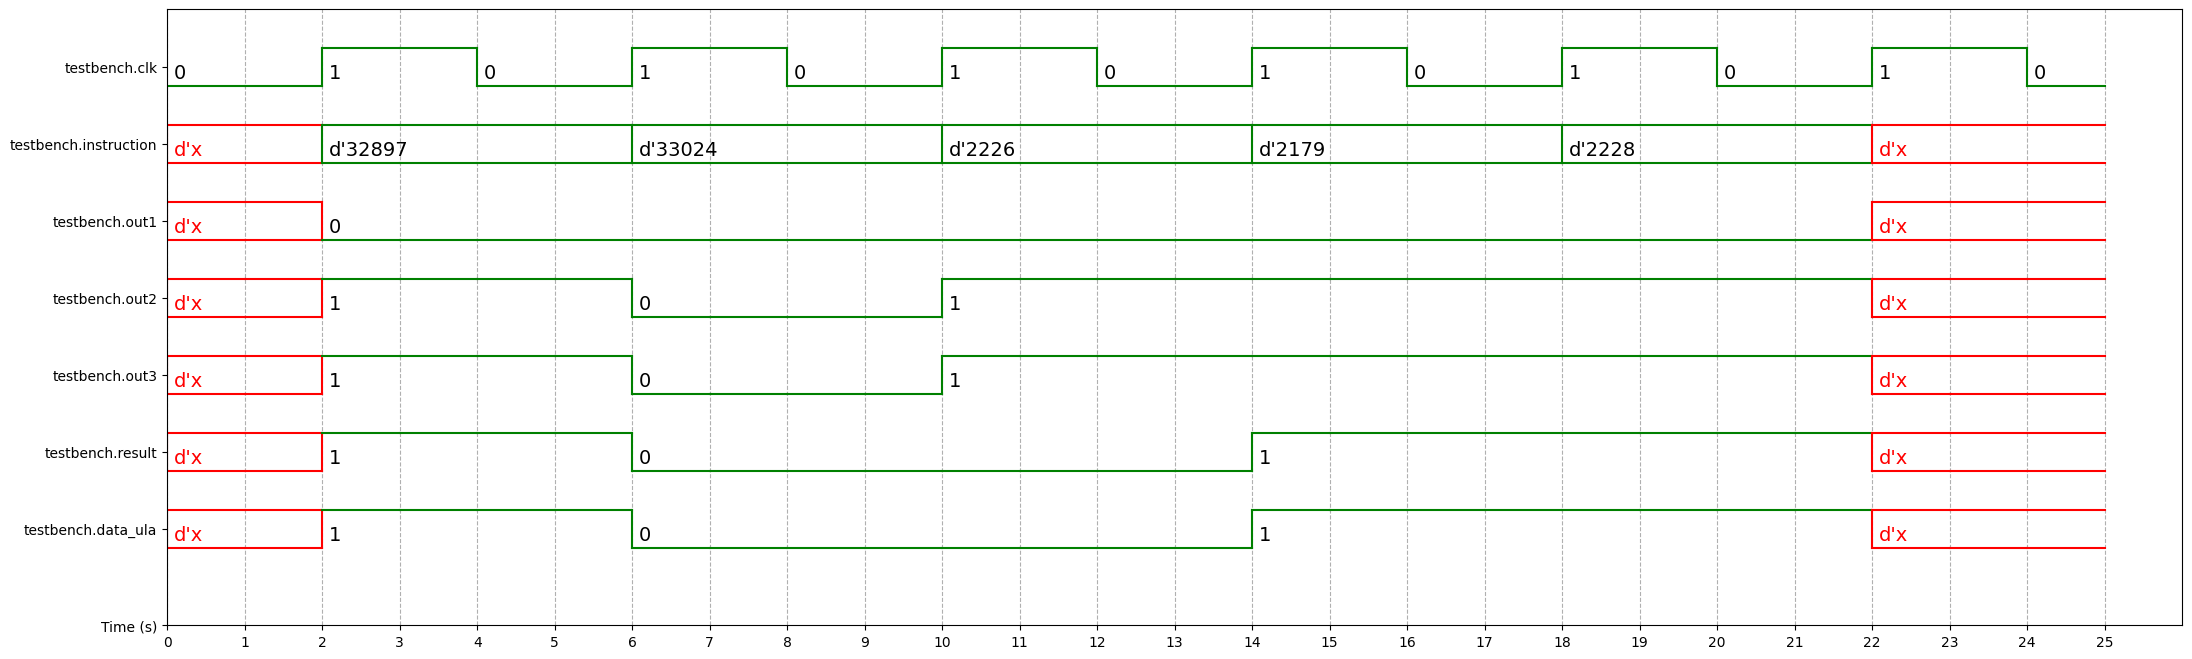

In [13]:
%%waveform cpu.vcd

sign_list = ['testbench.clk', 'testbench.instruction', 'testbench.out1', 'testbench.out2', 'testbench.out3', 'testbench.result', 'testbench.data_ula']
time_begin = 0
time_end = 25
base = 'dec' # bin, dec, dec2, hex, octal

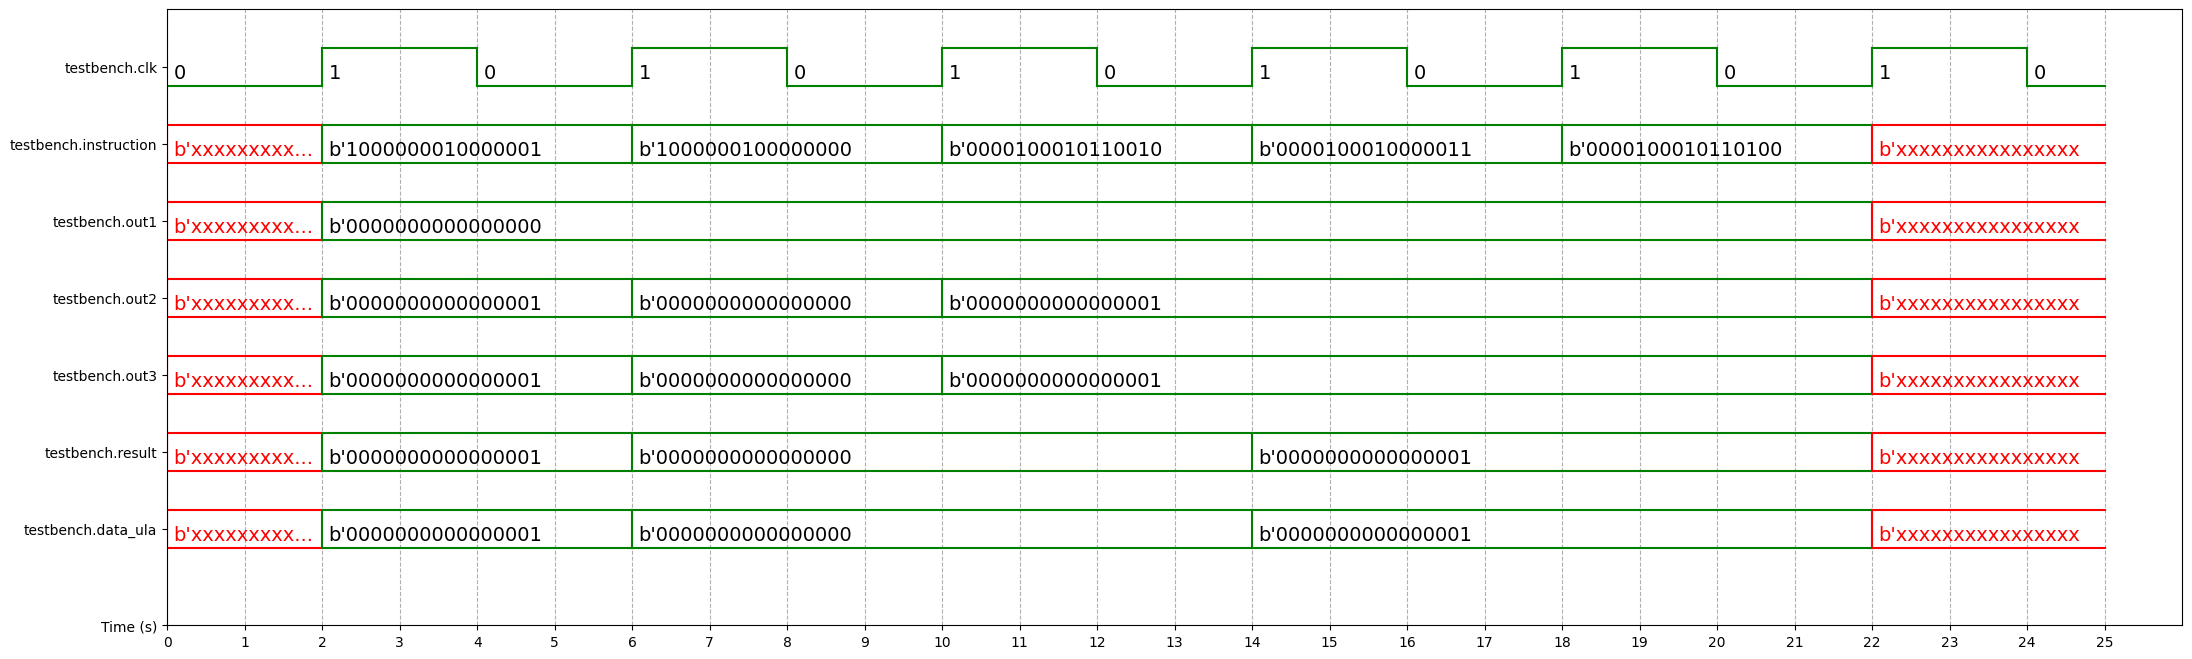

In [14]:
%%waveform cpu.vcd

sign_list = ['testbench.clk', 'testbench.instruction', 'testbench.out1', 'testbench.out2', 'testbench.out3', 'testbench.result', 'testbench.data_ula']
time_begin = 0
time_end = 25
base = 'bin' # bin, dec, dec2, hex, octal